<a href="https://colab.research.google.com/github/XM2202-02/CNN-FaceEmo/blob/main/CNNCAMXUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
pip install tensorflow

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
from keras.utils import load_img,img_to_array,to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_face= '/content/drive/MyDrive/TRAIN_FACE_EMO'
val_train= '/content/drive/MyDrive/TRAIN_FACE_EMO'
train_emo= '/content/drive/MyDrive/TRAIN_EMO'
val_emo= '/content/drive/MyDrive/TRAIN_EMO'
train_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2,
    brightness_range=[0.9,1.5]
)
val_datagen= ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
train_generator_face= train_datagen.flow_from_directory(
    train_face,
    target_size=(64,64),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)
val_generator_face= val_datagen.flow_from_directory(
    val_train,
    target_size=(64,64),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)

train_generator_emo= train_datagen.flow_from_directory(
    train_emo,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'
)

val_generator_emo= val_datagen.flow_from_directory(
    val_emo,
    target_size=(64,64),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'

)
model_face = Sequential([
    Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(64,64,3)),
    Conv2D(32,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation='relu'),Dropout(0.5),
    Dense(128,activation='relu'),Dropout(0.5),
    Dense(train_generator_face.num_classes,activation='softmax')
])
model_emo= Sequential([
    Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(64,64,3)),
    Conv2D(32,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation='relu'),Dropout(0.5),
    Dense(128,activation='relu'),Dropout(0.5),
    Dense(train_generator_emo.num_classes,activation='softmax')
])
model_face.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_emo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



history_face= model_face.fit(
    train_generator_face,
    epochs=100,
    steps_per_epoch=len(train_generator_face),
    validation_data=val_generator_face,
    validation_steps=len(val_generator_face)
)
history = model_emo.fit(
    train_generator_emo,
    steps_per_epoch=len(train_generator_emo),
    epochs=60,
    validation_data=val_generator_emo,
    validation_steps=len(val_generator_emo)
)


Found 95 images belonging to 5 classes.
Found 95 images belonging to 5 classes.
Found 94 images belonging to 4 classes.
Found 94 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 8s/step - accuracy: 0.1738 - loss: 1.6999 - val_accuracy: 0.2105 - val_loss: 1.6056
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.2381 - loss: 1.6236 - val_accuracy: 0.2105 - val_loss: 1.6067
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.1549 - loss: 1.6109 - val_accuracy: 0.2211 - val_loss: 1.6071
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.1697 - loss: 1.6076 - val_accuracy: 0.2211 - val_loss: 1.6064
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.1676 - loss: 1.6109 - val_accuracy: 0.2105 - val_loss: 1.6065
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.1960 - loss: 1.6042 - val_accuracy: 0.2105 - val_loss: 1.6054
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.1881 - loss: 1.6082 - val_accuracy: 0.2105 - val_loss: 1.6037
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.2197 - loss: 1.6007 - val_accuracy: 0.2105 - val_loss: 1.5989
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Người này đang : Ngạc nhiên


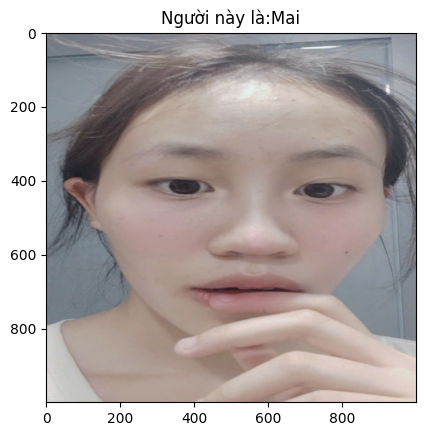

In [10]:
img = load_img('/content/z6518182075241_85859bbbc21ef3352fe33267a007c630.jpg', target_size=(1000, 1000))
plt.imshow(img)
img = img.resize((64, 64))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 64, 64, 3)

prediction_face = model_face.predict(img_array)
class_names_face = list(train_generator_face.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction_face)]
plt.title(f'Người này là:{predicted_class_face}')

classes = list(train_generator_emo.class_indices.keys())  # Ví dụ ['angry', 'happy', 'neutral', ...]
predicted_emo = model_emo.predict(img_array)
label = classes[np.argmax(predicted_emo)]

print("Người này đang :", label)
